Exploring the IMDb data to see if it would be viable for further analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import patsy
import scipy.stats as stats
import pickle
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn import metrics

In [2]:
book_movie_imdb = pd.read_csv('book_movie_imdb.csv')

In [6]:
book_movie_imdb.describe().round(2)

,book_rating,book_year_published,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,404.00,403.00,403.00,404.00,396.00,404.00,404.00,3.700000e+02,404.00,404.00,403.00,403.00,3.820000e+02,396.00,404.00,404.00,401.00,404.00
mean,3.94,1968.92,194.26,120.69,1367.27,1064.58,9064.17,6.809704e+07,152275.68,13910.75,1.11,457.04,7.593124e+07,2000.60,2826.65,6.97,2.16,16122.42
std,0.23,92.87,129.48,27.30,4155.64,2591.68,10711.32,7.630748e+07,191274.72,16770.76,1.64,489.06,6.244250e+08,14.84,5227.96,0.93,0.75,28348.57
min,3.21,536.00,2.00,30.00,0.00,0.00,5.00,2.874000e+03,29.00,5.00,0.00,3.00,1.000000e+04,1932.00,0.00,3.10,1.33,0.00
25%,3.81,1967.00,98.00,103.75,17.75,190.50,845.50,1.611952e+07,34404.00,2071.00,0.00,150.00,1.400000e+07,1997.00,441.75,6.40,1.85,0.00
50%,3.95,1992.00,162.00,116.00,97.50,426.00,3000.00,4.214892e+07,86164.00,5723.50,1.00,269.00,2.900000e+07,2005.00,744.00,7.10,2.35,849.50
75%,4.09,2002.00,262.50,134.00,353.00,694.50,15000.00,8.301939e+07,179437.00,20051.00,2.00,551.50,5.775000e+07,2010.00,1000.00,7.70,2.35,20000.00
max,4.56,2015.00,676.00,240.00,22000.00,19000.00,87000.00,4.079993e+08,1347461.00,120797.00,15.00,2968.00,1.221550e+10,2016.00,29000.00,9.20,16.00,190000.00


In [8]:
#Let's examine the initial relationship between our variables
book_movie_imdb.corr()

,book_rating,book_year_published,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
book_rating,1.000000,0.075388,0.064707,0.195587,0.072749,0.091388,0.097077,0.259402,0.288738,0.114981,0.009217,0.160529,-0.016854,-0.148047,0.087058,0.411315,0.023385,0.146920
book_year_published,0.075388,1.000000,0.067124,-0.038442,0.014878,-0.009693,-0.037549,-0.025876,0.074175,-0.054484,-0.001048,0.041860,0.010451,0.092618,-0.109267,0.014540,0.021271,0.104304
num_critic_for_reviews,0.064707,0.067124,1.000000,0.190685,0.265986,0.214191,0.310122,0.441045,0.535640,0.326648,-0.048890,0.555490,0.098659,0.397242,0.274150,0.225781,0.037899,0.661328
duration,0.195587,-0.038442,0.190685,1.000000,0.216022,0.053165,0.057561,0.276561,0.347378,0.064990,-0.017924,0.389864,-0.005762,-0.096289,0.044648,0.323430,-0.052389,0.153697
director_facebook_likes,0.072749,0.014878,0.265986,0.216022,1.000000,0.164313,0.169004,0.259208,0.356676,0.203146,-0.053787,0.225507,0.006879,-0.003925,0.211381,0.191922,-0.006243,0.157302
actor_3_facebook_likes,0.091388,-0.009693,0.214191,0.053165,0.164313,1.000000,0.429999,0.284611,0.168798,0.689219,0.066083,0.195255,0.000337,0.136831,0.639649,-0.015568,0.006304,0.072760
actor_1_facebook_likes,0.097077,-0.037549,0.310122,0.057561,0.169004,0.429999,1.000000,0.254815,0.232190,0.918449,0.061076,0.204587,-0.018479,0.248205,0.606847,0.028574,0.028728,0.199773
gross,0.259402,-0.025876,0.441045,0.276561,0.259208,0.284611,0.254815,1.000000,0.512469,0.335710,-0.047081,0.521541,-0.000311,-0.042315,0.331038,0.197849,-0.020281,0.245353
num_voted_users,0.288738,0.074175,0.535640,0.347378,0.356676,0.168798,0.232190,0.512469,1.000000,0.226482,-0.079016,0.751438,-0.001719,0.019129,0.145001,0.494445,0.003383,0.453548
cast_total_facebook_likes,0.114981,-0.054484,0.326648,0.064990,0.203146,0.689219,0.918449,0.335710,0.226482,1.000000,0.068411,0.219889,-0.012354,0.246127,0.837710,0.019406,0.015200,0.189314


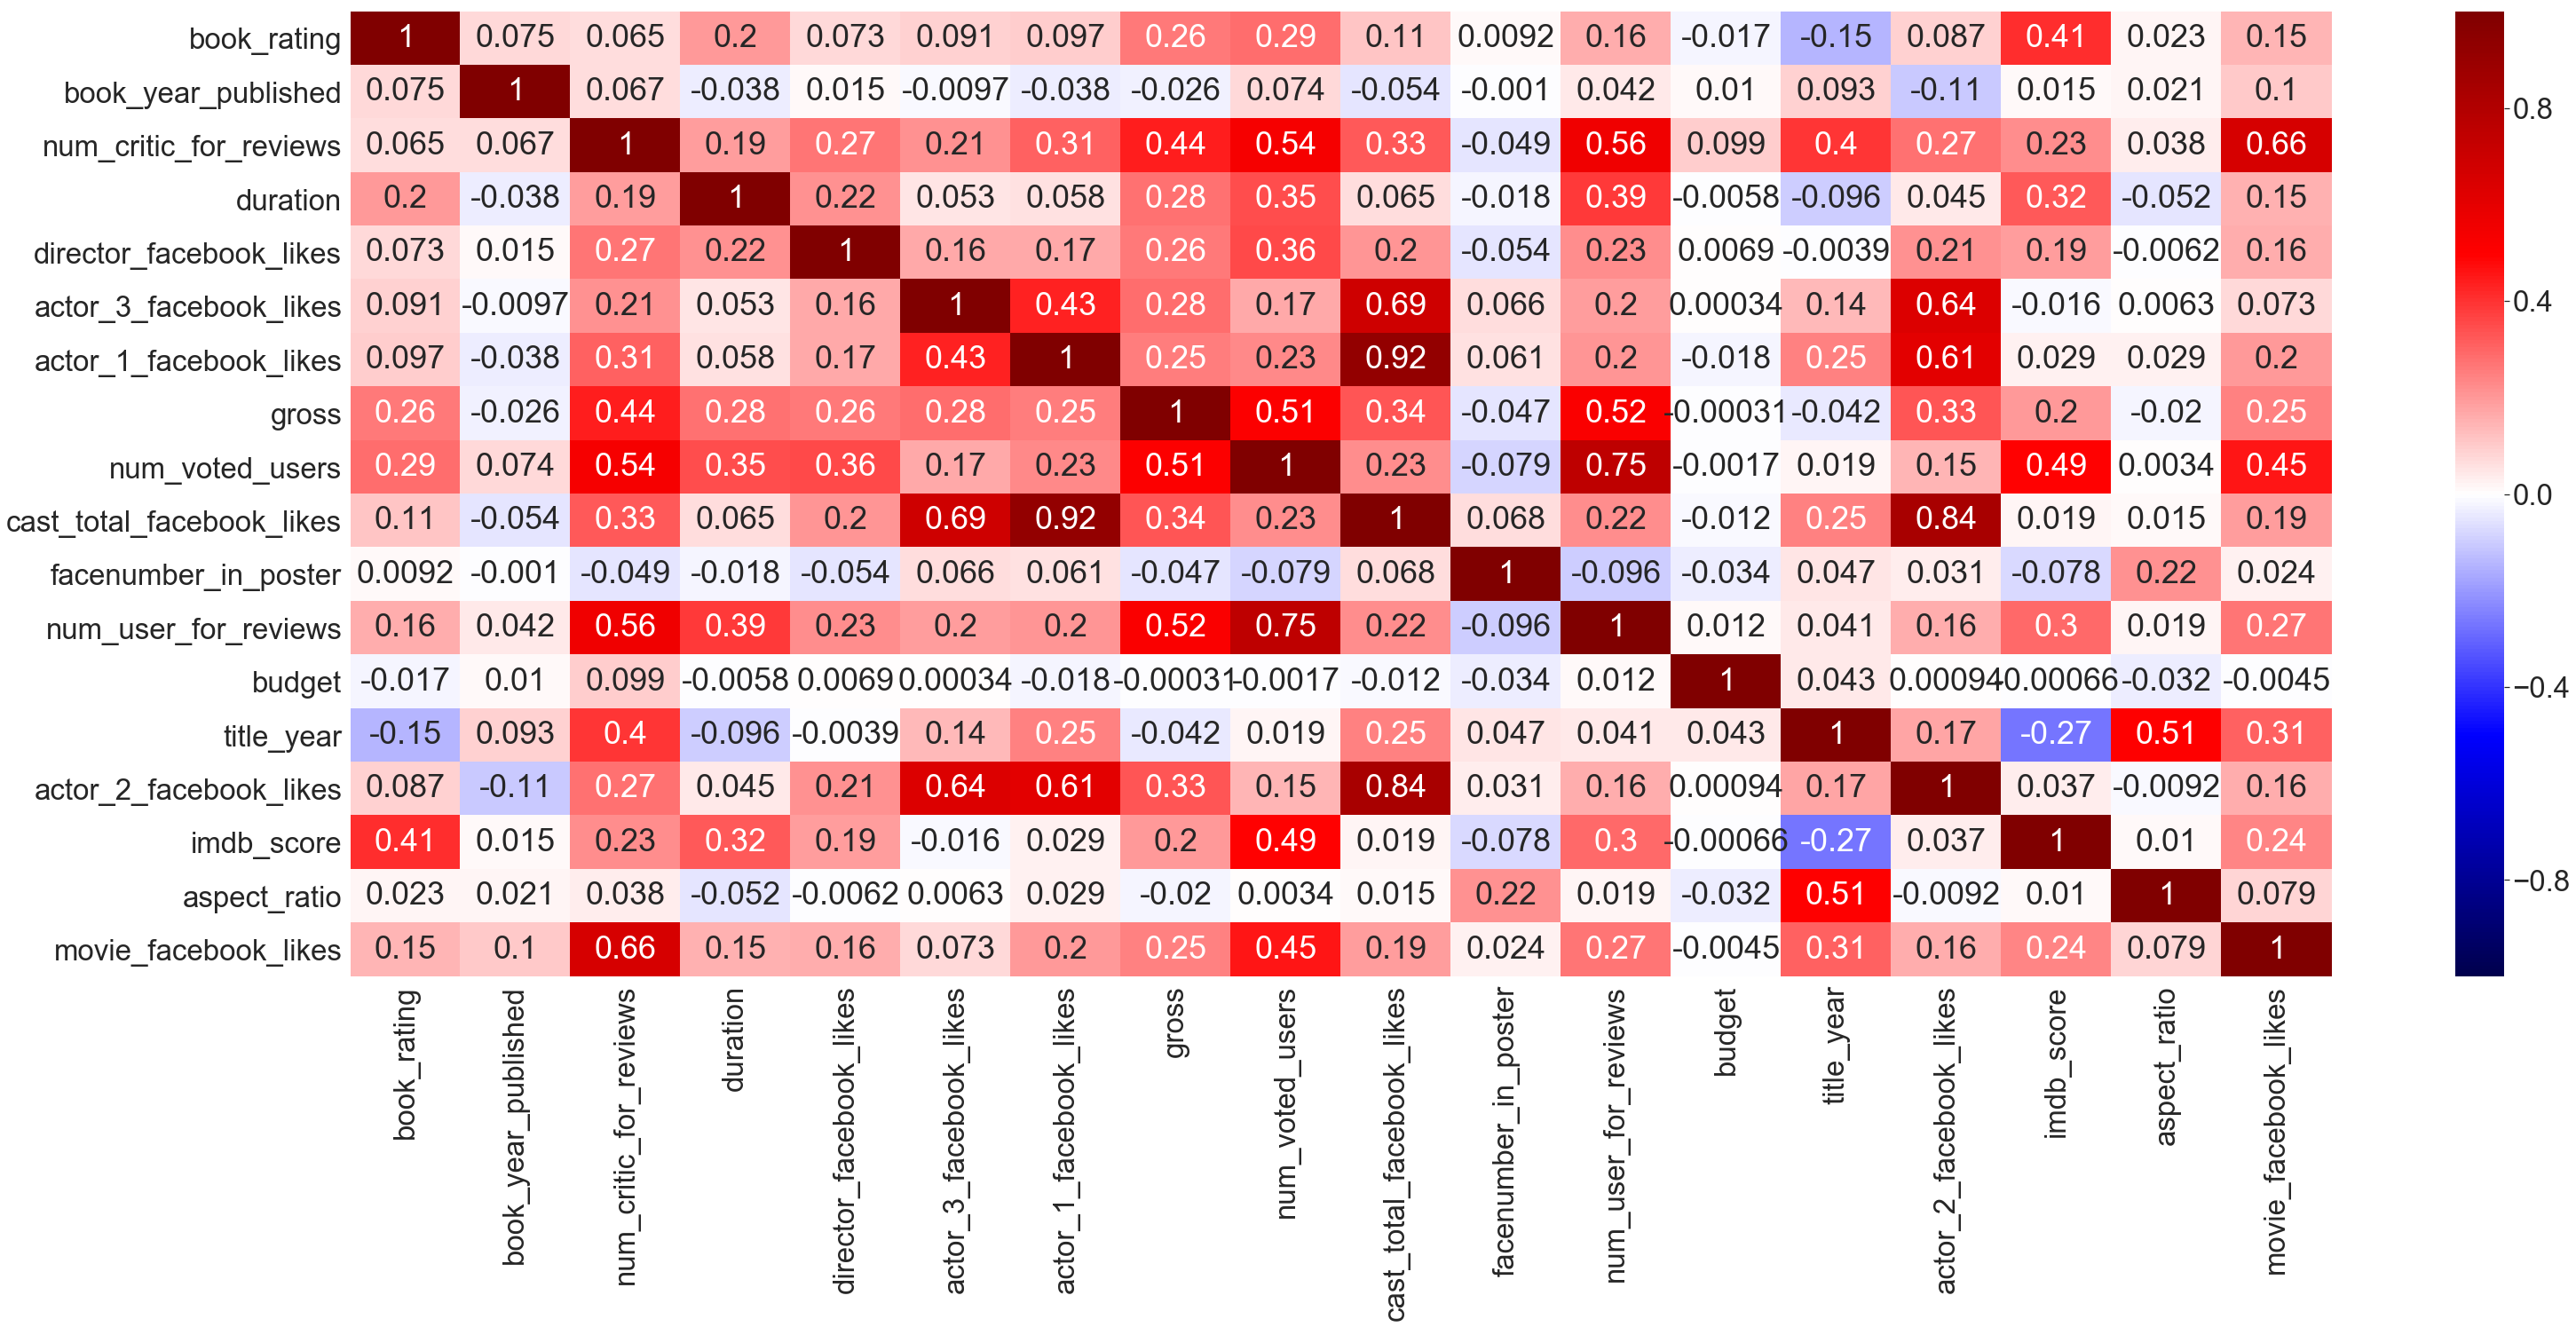

In [9]:
sns.set(font_scale=3) 
plt.figure(figsize=(50,20))
sns.heatmap(book_movie_imdb.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


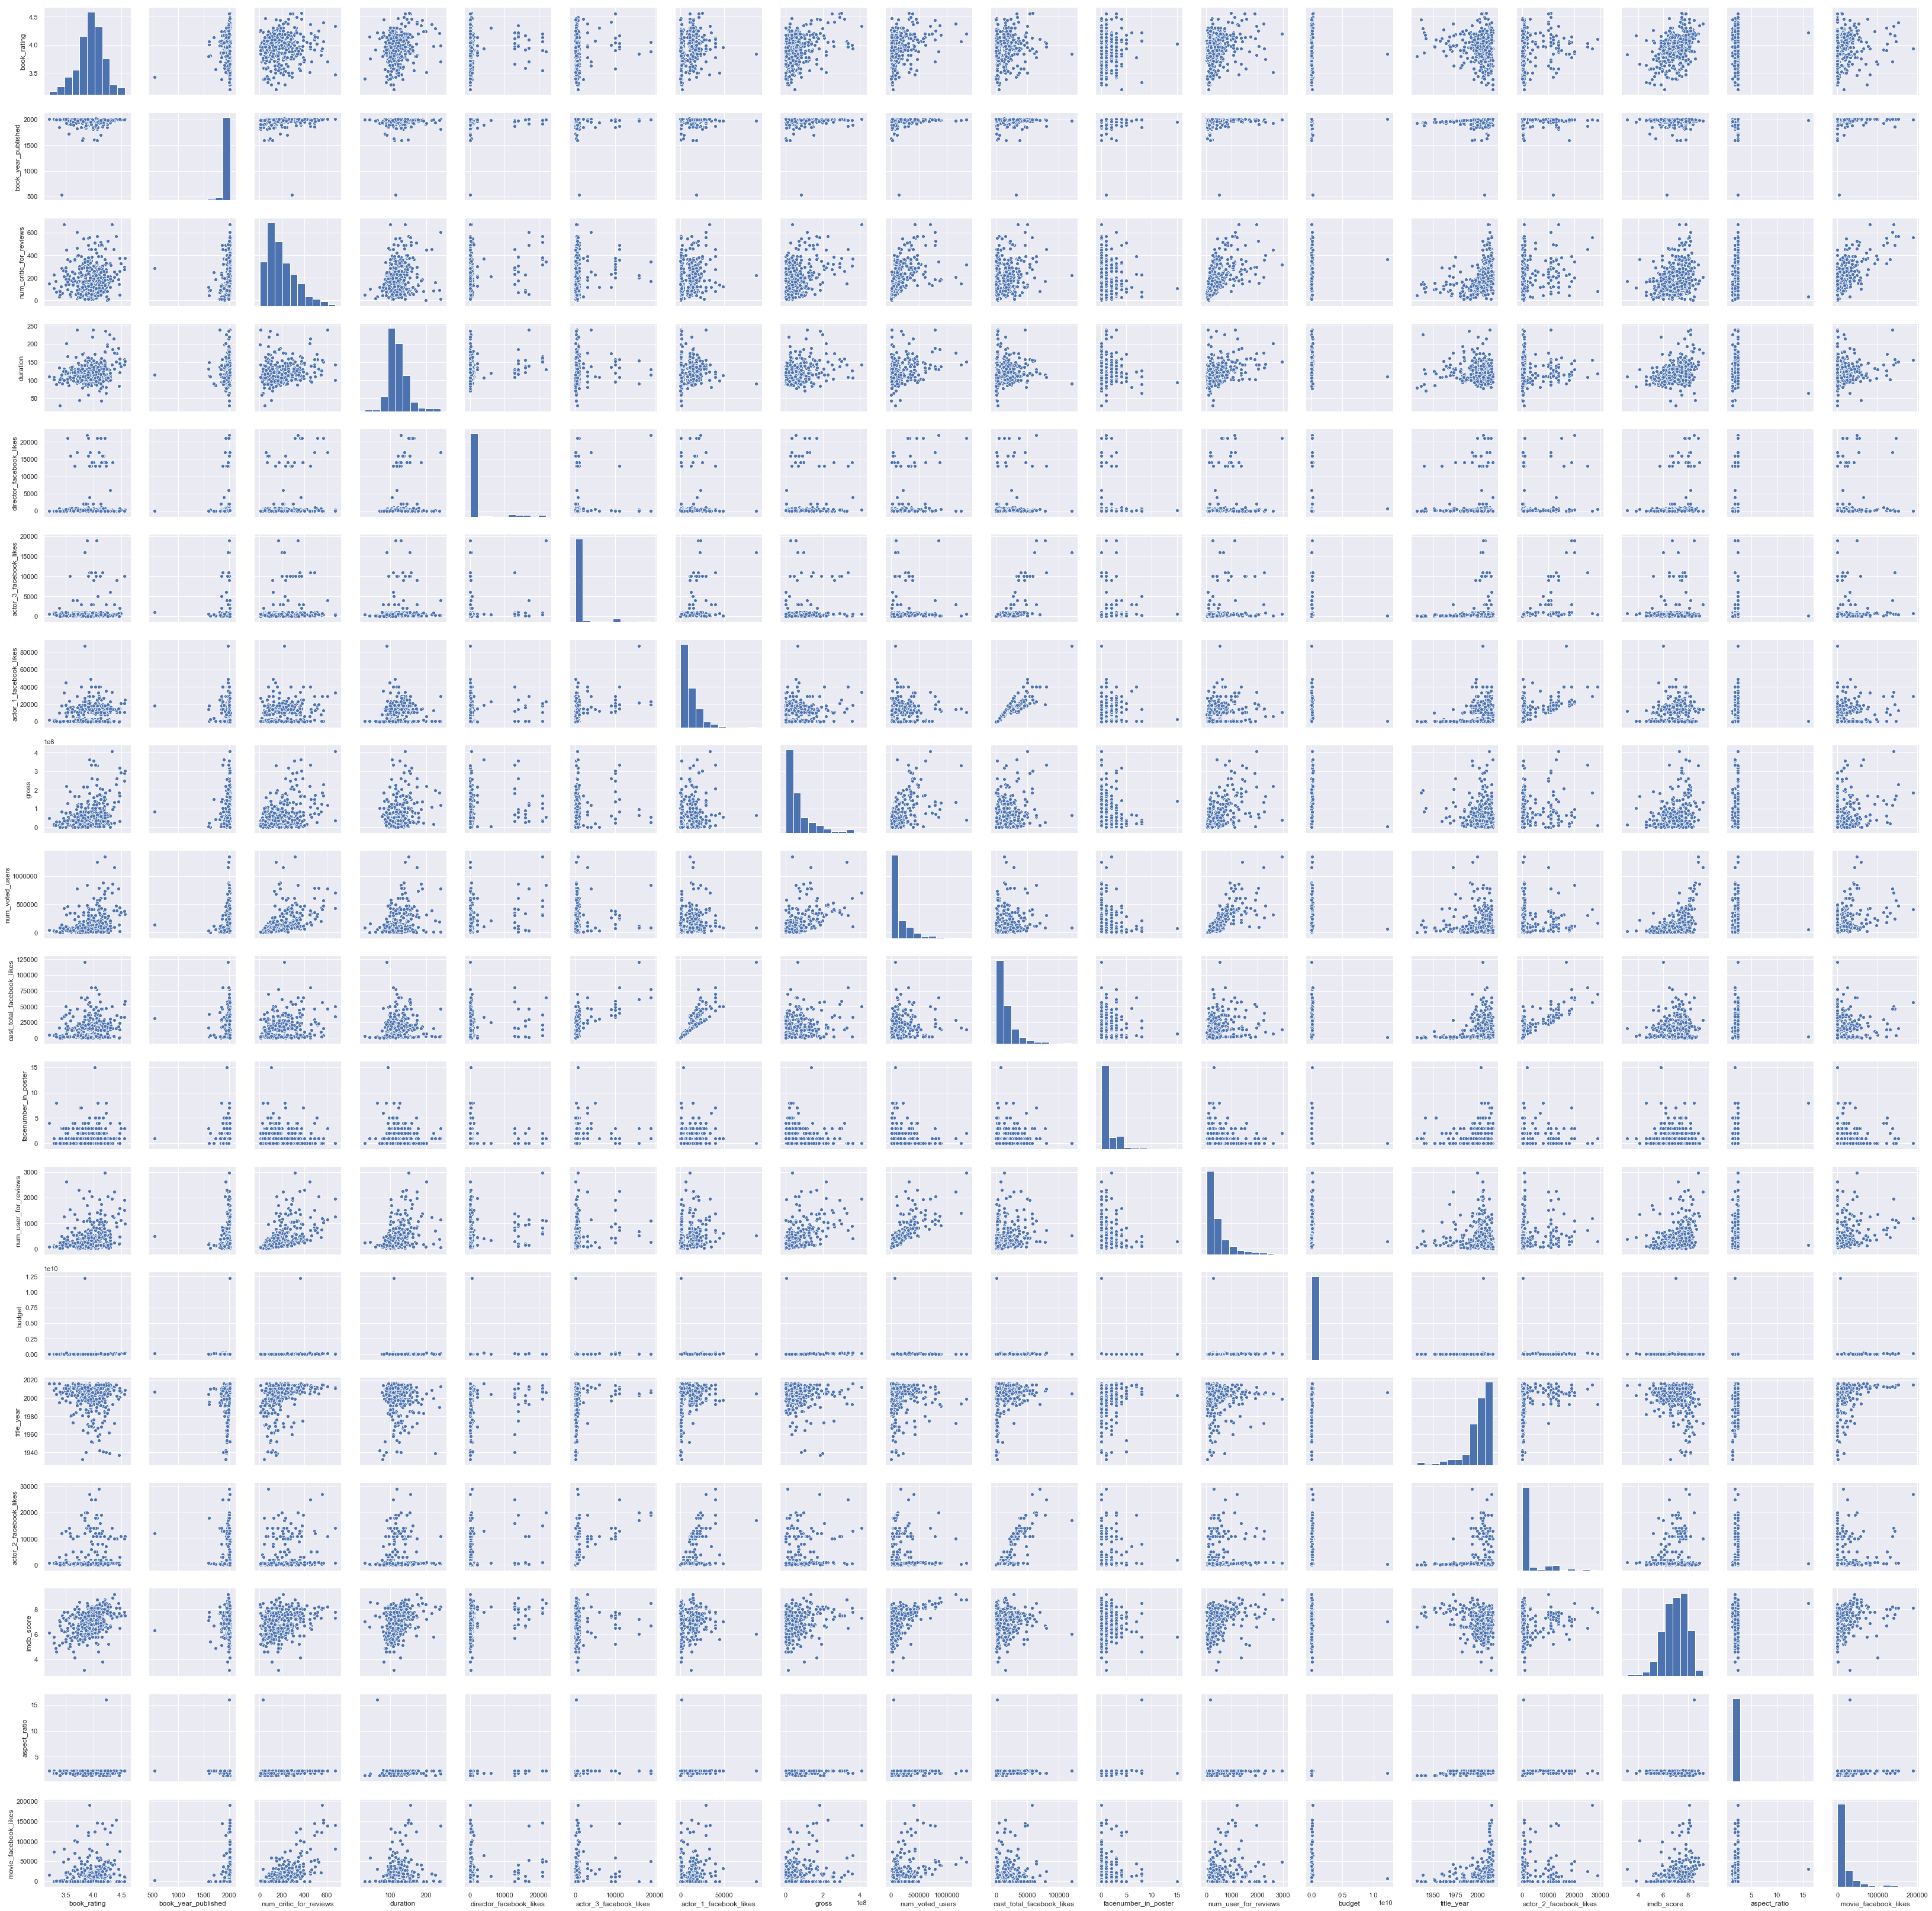

In [10]:
#Examine the histrograms:
sns.set(font_scale=1) 
sns.pairplot(book_movie_imdb);